# Data Visualisation

## Imports & Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import ast
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [22]:
from wordcloud import WordCloud

In [6]:
import os

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\AIT EL
[nltk_data]     MOUDDENE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\AIT EL
[nltk_data]     MOUDDENE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_parquet("preprocessed_legal_data.parquet")

## Plots

### plot_text_length_distributions

In [10]:
def plot_text_length_distributions(df, text_col='cleaned_text', summary_col='summary/long', sentence_col='sentences'):

    # Calculate lengths
    df['original_length'] = df[text_col].apply(len)
    df['summary_length'] = df[summary_col].apply(len)
    df['length_ratio'] = df['summary_length'] / df['original_length']

    # Start plotting
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    sns.histplot(df['original_length'], kde=True)
    plt.title('Distribution of Original Text Length')
    plt.xlabel('Character Count')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

    plt.subplot(1, 3, 2)
    sns.histplot(df['summary_length'], kde=True)
    plt.title('Distribution of Summary Length')
    plt.xlabel('Character Count')

    plt.subplot(1, 3, 3)
    sns.histplot(df['length_ratio'], kde=True)
    plt.title('Summary to Original Text Ratio')
    plt.xlabel('Ratio')

    plt.tight_layout()
    plt.show()


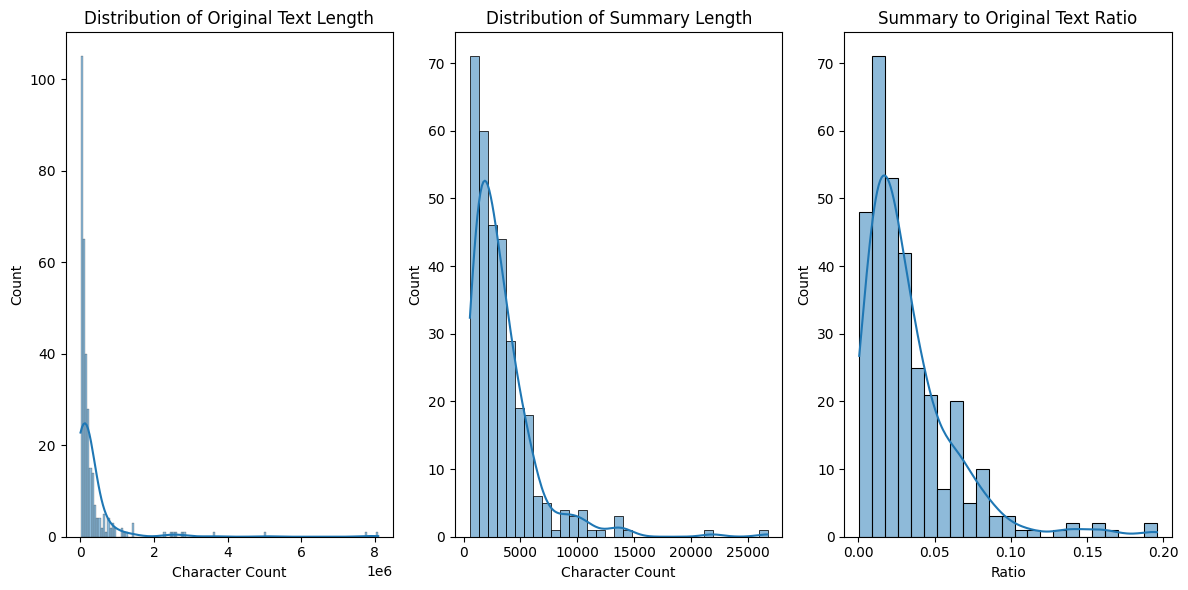

In [11]:
plot_text_length_distributions(df)

### plot_word_count_distributions

In [12]:
def plot_word_count_distributions(df, text_col='cleaned_text', summary_col='summary/long'):

    # Calculate word counts
    df['original_word_count'] = df[text_col].apply(lambda x: len(word_tokenize(x)))
    df['summary_word_count'] = df[summary_col].apply(lambda x: len(word_tokenize(x)))
    df['word_count_ratio'] = df['summary_word_count'] / df['original_word_count']

    # Start plotting
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    sns.histplot(df['original_word_count'], kde=True)
    plt.title('Word Count in Original Texts')
    plt.xlabel('Word Count')

    plt.subplot(1, 3, 2)
    sns.histplot(df['summary_word_count'], kde=True)
    plt.title('Word Count in Summaries')
    plt.xlabel('Word Count')

    plt.subplot(1, 3, 3)
    sns.histplot(df['word_count_ratio'], kde=True)
    plt.title('Summary to Original Word Count Ratio')
    plt.xlabel('Ratio')

    plt.tight_layout()
    plt.show()

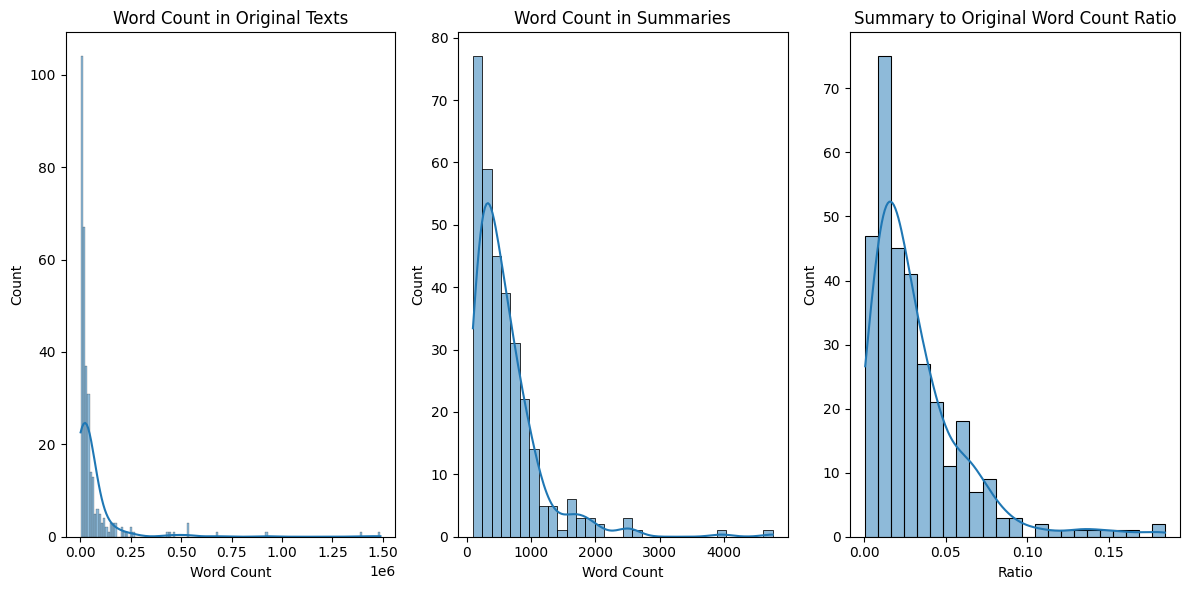

In [13]:
plot_word_count_distributions(df)

### plot_sentence_analysis

In [14]:
def plot_sentence_analysis(df, sentence_col='sentences', summary_col='summary/long'):

    # Ensure 'original_word_count' is already computed
    if 'original_word_count' not in df.columns:
        raise ValueError("Please compute 'original_word_count' (e.g., using word_tokenize) before calling this function.")

    # Calculate sentence-related stats
    df['sentence_count'] = df[sentence_col].apply(len)
    df['avg_sentence_length'] = df['original_word_count'] / df['sentence_count']

    # Estimate number of sentences in summaries using heuristic
    df['summary_sentence_count'] = df[summary_col].apply(lambda x: len(x.split('. ')))

    # Plotting
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df['sentence_count'], kde=True)
    plt.title('Number of Sentences in Original Texts')
    plt.xlabel('Sentence Count')

    plt.subplot(1, 2, 2)
    sns.histplot(df['avg_sentence_length'], kde=True)
    plt.title('Average Sentence Length')
    plt.xlabel('Words per Sentence')

    plt.tight_layout()
    plt.show()

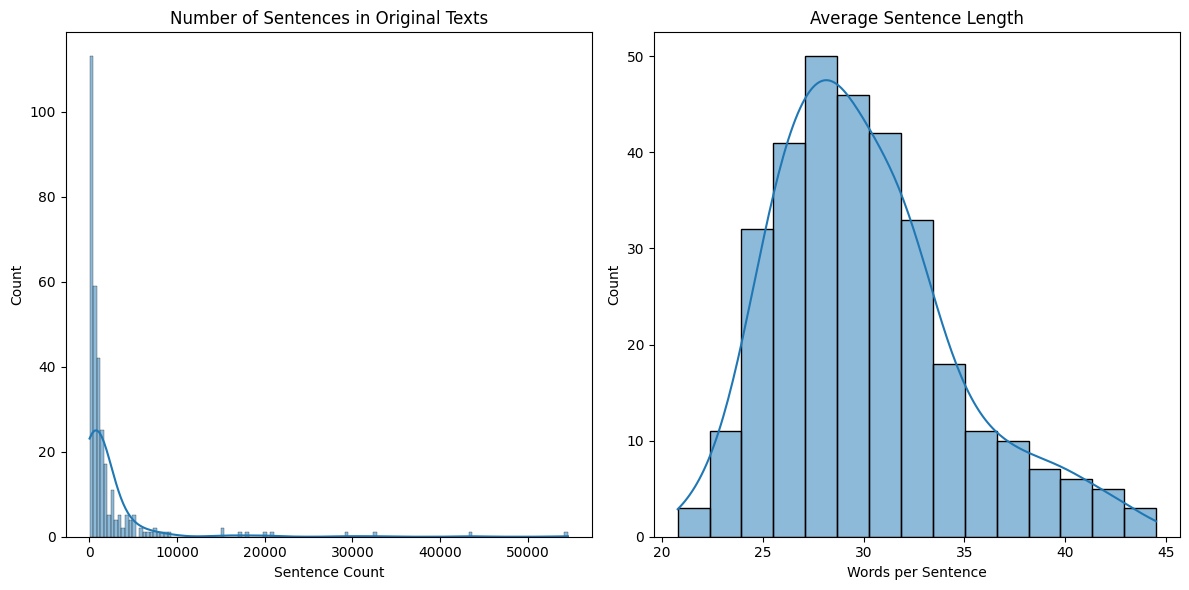

In [15]:
plot_sentence_analysis(df)

### plot_document_comparison

In [16]:
def plot_document_comparison(df, id_col='id', sample_size=20):

    # Check required columns
    for col in ['original_word_count', 'summary_word_count']:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' must exist in the DataFrame. Compute word counts before calling this.")

    # Randomly sample documents
    sample_df = df.sample(min(sample_size, len(df)))

    # Bar plot setup
    x = np.arange(len(sample_df))
    width = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(x - width / 2, sample_df['original_word_count'], width, label='Original')
    plt.bar(x + width / 2, sample_df['summary_word_count'], width, label='Summary')

    plt.xlabel('Document Index')
    plt.ylabel('Word Count')
    plt.title('Original vs Summary Word Count Comparison')
    plt.legend()
    plt.xticks(x, sample_df[id_col], rotation=90)

    plt.tight_layout()
    plt.show()

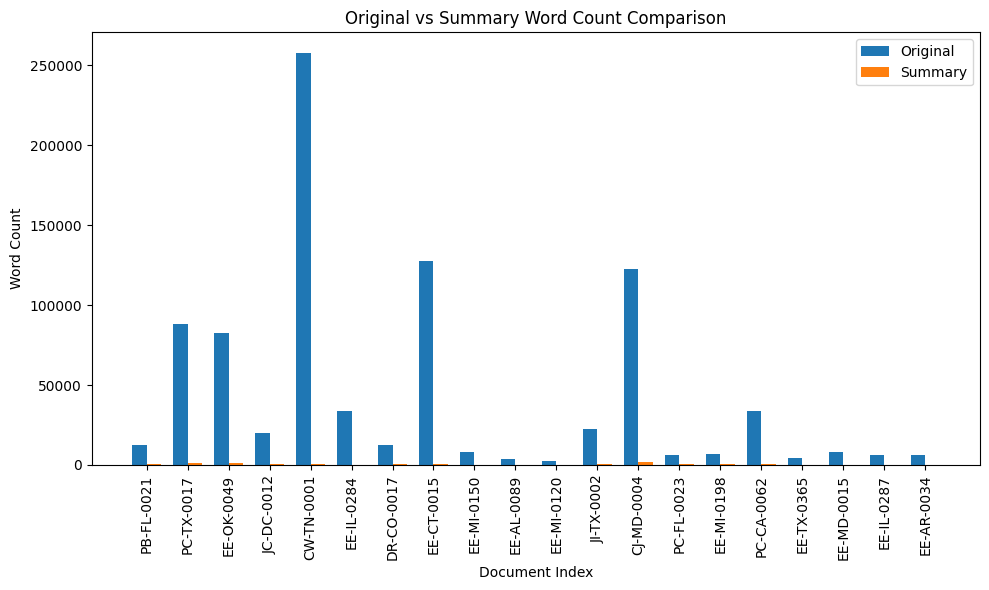

In [17]:
plot_document_comparison(df)

### plot_compression_ratio

In [18]:
def plot_compression_ratio(df):

    # Check required columns
    for col in ['original_word_count', 'summary_word_count']:
        if col not in df.columns:
            raise ValueError(f"Missing column: {col}. Compute word counts before calling this function.")

    # Calculate compression ratio
    df['compression_ratio'] = 1 - df['summary_word_count'] / df['original_word_count']

    # Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df['compression_ratio'])
    plt.title('Compression Ratio Distribution')
    plt.ylabel('Compression Ratio (higher = more compressed)')

    plt.tight_layout()
    plt.show()

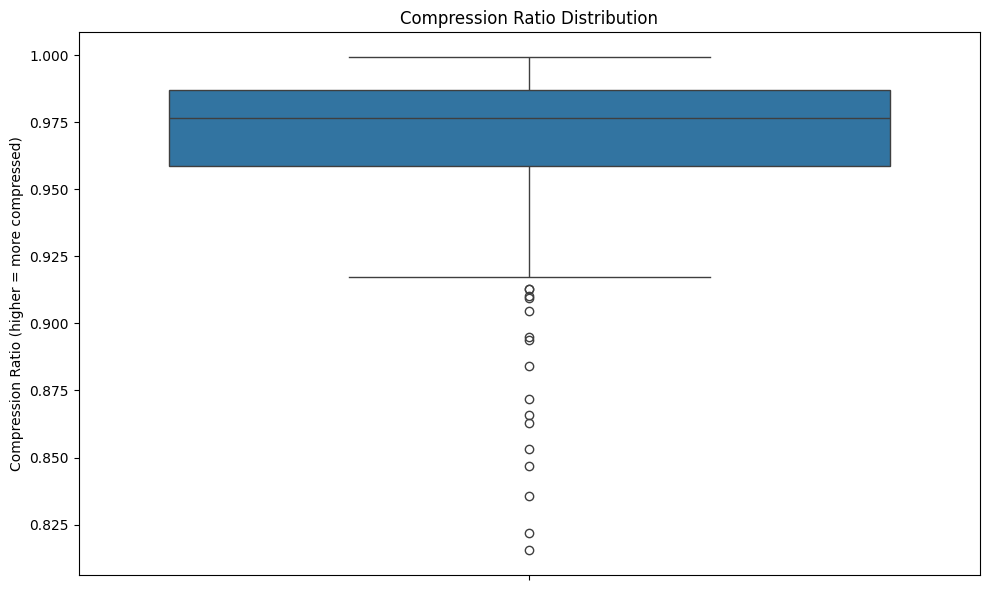

In [19]:
plot_compression_ratio(df)

### create_wordcloud

In [23]:
def create_wordcloud(text_series, title):

    plt.figure(figsize=(12, 8))

    # Combine all text
    all_text = ' '.join(text_series)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(all_text)
    filtered_text = ' '.join([word for word in words if word.lower() not in stop_words and word.isalpha()])

    # Generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=100,
        contour_width=3,
        contour_color='steelblue'
    ).generate(filtered_text)

    # Plot
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout()
    plt.show()

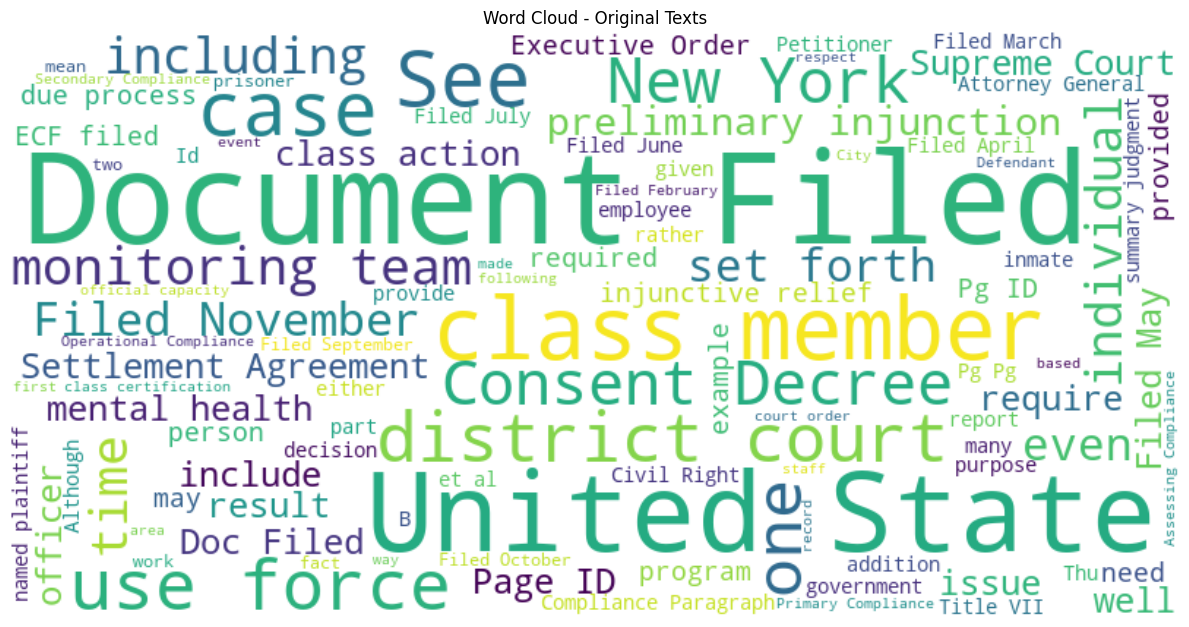

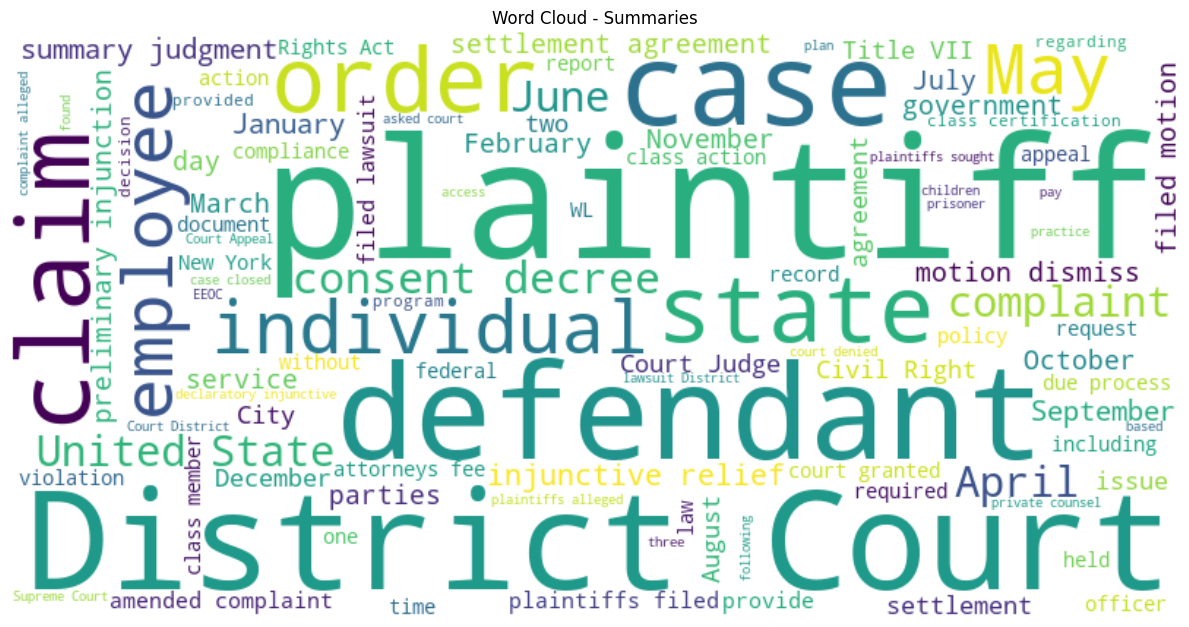

In [24]:
create_wordcloud(df['cleaned_text'], 'Word Cloud - Original Texts')
create_wordcloud(df['summary/long'], 'Word Cloud - Summaries')

### plot_top_words_comparison

In [25]:
def plot_top_words_comparison(df, text_col='cleaned_text', summary_col='summary/long', top_n=15):

    stop_words = set(stopwords.words('english'))

    # Original text word frequencies
    all_original_words = ' '.join(df[text_col]).lower()
    original_words = [
        word for word in word_tokenize(all_original_words)
        if word.isalpha() and word.lower() not in stop_words
    ]
    original_counter = Counter(original_words).most_common(top_n)

    # Summary word frequencies
    all_summary_words = ' '.join(df[summary_col]).lower()
    summary_words = [
        word for word in word_tokenize(all_summary_words)
        if word.isalpha() and word.lower() not in stop_words
    ]
    summary_counter = Counter(summary_words).most_common(top_n)

    # Plot
    plt.figure(figsize=(14, 7))

    plt.subplot(1, 2, 1)
    sns.barplot(y=[word for word, _ in original_counter],
                x=[count for _, count in original_counter],
                palette="Blues_d")
    plt.title('Top Words in Original Texts')
    plt.xlabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.barplot(y=[word for word, _ in summary_counter],
                x=[count for _, count in summary_counter],
                palette="Greens_d")
    plt.title('Top Words in Summaries')
    plt.xlabel('Frequency')

    plt.tight_layout()
    plt.show()

C:\Users\AIT EL MOUDDENE\AppData\Local\Temp\ipykernel_25436\1438641868.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=[word for word, _ in original_counter],
C:\Users\AIT EL MOUDDENE\AppData\Local\Temp\ipykernel_25436\1438641868.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=[word for word, _ in summary_counter],


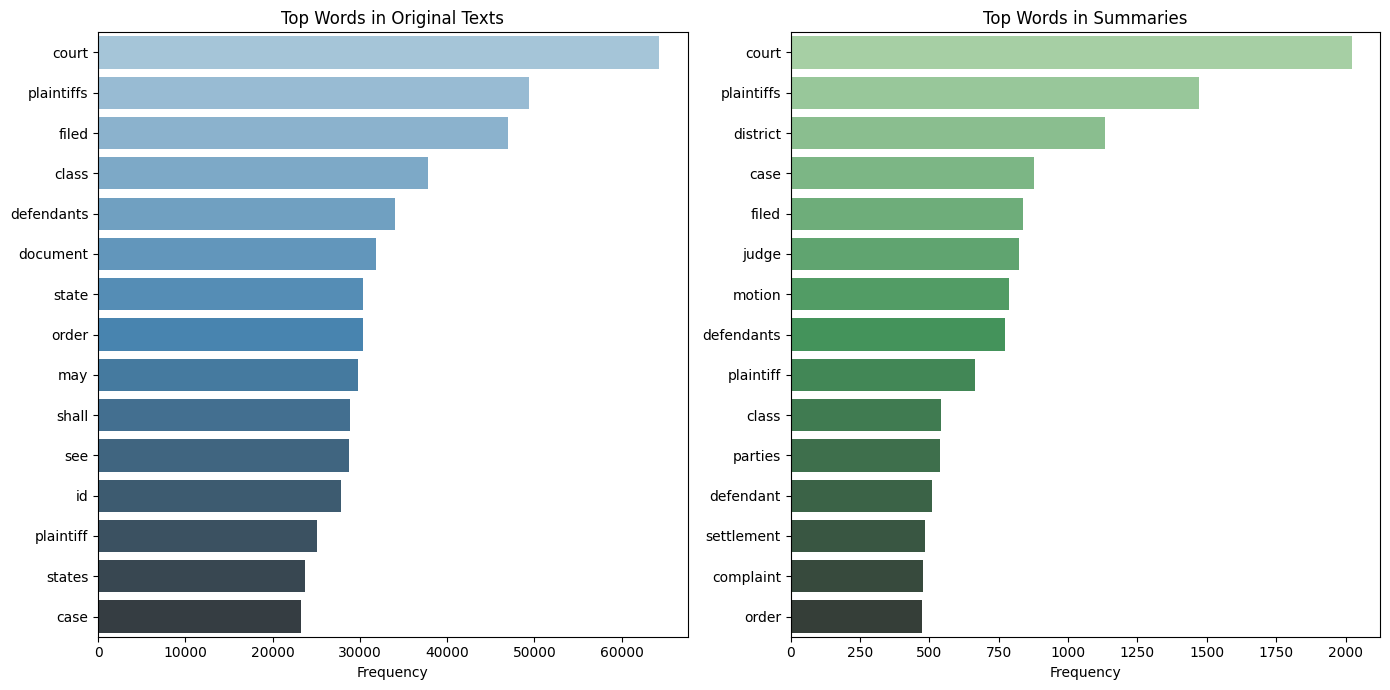

In [26]:
plot_top_words_comparison(df)